# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 19.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
231167,1.3843,0.2686,0.1196,0.7910,0.3711,0.1343,0.5444,0.7520,0.6665,0.5273,5,5,16,16
4167,0.3809,0.0415,0.0024,0.0024,0.0024,0.0024,0.0024,0.0781,0.0024,0.0024,5,0,1,0
218614,0.7666,0.1831,0.0024,0.0024,0.0024,0.0024,0.0049,0.1978,0.0024,0.0757,10,10,14,14
115443,0.4590,0.0562,0.0024,0.0610,0.0024,0.0024,0.0684,0.7837,0.0024,0.4150,7,7,2,2
178420,0.8618,0.1758,0.1636,0.0024,0.0024,0.0024,0.0610,0.3296,0.0024,0.1514,2,2,10,10


In [3]:
raw_data.shape

(467289, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467289 entries, 0 to 467288
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          467289 non-null  float64
 1   Emg2          467289 non-null  float64
 2   Emg3          467289 non-null  float64
 3   Emg4          467289 non-null  float64
 4   Emg5          467289 non-null  float64
 5   Emg6          467289 non-null  float64
 6   Emg7          467289 non-null  float64
 7   Emg8          467289 non-null  float64
 8   Emg9          467289 non-null  float64
 9   Emg10         467289 non-null  float64
 10  repetition    467289 non-null  int64  
 11  rerepetition  467289 non-null  int64  
 12  stimulus      467289 non-null  int64  
 13  restimulus    467289 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.9 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000,467289.000000
mean,0.453055,0.139742,0.094868,0.055296,0.016373,0.008648,0.103495,0.283430,0.048519,0.198897,3.162582,2.379900,5.604711,4.253644
std,0.482096,0.205522,0.222762,0.168492,0.067662,0.027839,0.267785,0.441489,0.142963,0.471025,3.483738,3.311147,6.578120,6.243255
min,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.085400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.017100,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.336900,0.063500,0.002400,0.002400,0.002400,0.002400,0.019500,0.119600,0.002400,0.007300,2.000000,0.000000,3.000000,0.000000
75%,0.642100,0.185500,0.068400,0.007300,0.002400,0.002400,0.102500,0.397900,0.009800,0.188000,6.000000,5.000000,10.000000,8.000000
max,4.668000,4.416500,4.660600,3.276400,2.189900,0.744600,4.665500,4.668000,2.314500,4.665500,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     198607
8      15551
2      15541
7      15533
12     15532
4      15521
6      15515
9      15500
5      15490
11     15489
10     15466
1      15465
3      15447
14     10373
17     10359
13     10347
15     10313
16     10299
19      5181
18      5180
21      5172
22      5139
20      5135
23      5134
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

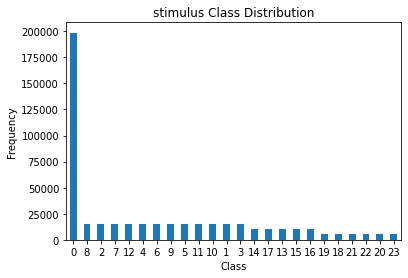

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
424428,2.1045,0.5518,0.8179,0.0562,0.0977,0.1318,0.8789,2.5098,0.1172,2.8052,1,1,20,20
248949,1.1523,0.3027,0.0073,0.0024,0.0024,0.0049,0.3442,0.7666,0.0269,0.7495,6,6,1,1
143583,0.3320,0.0684,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0,0,0,0
395720,0.1953,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
401279,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0024,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(392469, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392469 entries, 0 to 467288
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          392469 non-null  float64
 1   Emg2          392469 non-null  float64
 2   Emg3          392469 non-null  float64
 3   Emg4          392469 non-null  float64
 4   Emg5          392469 non-null  float64
 5   Emg6          392469 non-null  float64
 6   Emg7          392469 non-null  float64
 7   Emg8          392469 non-null  float64
 8   Emg9          392469 non-null  float64
 9   Emg10         392469 non-null  float64
 10  repetition    392469 non-null  int64  
 11  rerepetition  392469 non-null  int64  
 12  stimulus      392469 non-null  int64  
 13  restimulus    392469 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.9 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 75.91790455321426


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     38861
           1       0.64      0.62      0.63      2127
           2       0.62      0.65      0.63      2247
           3       0.64      0.64      0.64      2170
           4       0.73      0.72      0.72      2553
           5       0.69      0.68      0.68      2318
           6       0.72      0.71      0.71      2306
           7       0.62      0.62      0.62      2252
           8       0.67      0.65      0.66      2359
           9       0.51      0.50      0.51      1982
          10       0.53      0.50      0.52      2255
          11       0.60      0.61      0.60      2176
          12       0.55      0.55      0.55      2247
          13       0.68      0.67      0.68      1512
          14       0.61      0.63      0.62      1552
          15       0.60      0.60      0.60      1473
          16       0.63      0.63      0.63      1691
 

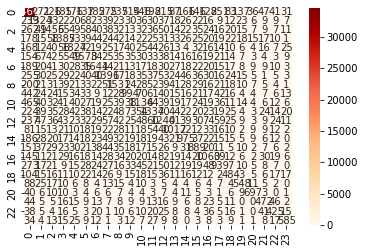

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.9121588911254364
MSE: 21.901584834509645
RMSE: 4.679912908859485


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.7589072235953275
Recall Score :  0.7591790455321425
f1_score :  0.7589790380970958


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 85.43965143832649


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     38861
           1       0.82      0.75      0.78      2127
           2       0.76      0.76      0.76      2247
           3       0.83      0.78      0.80      2170
           4       0.87      0.84      0.85      2553
           5       0.83      0.81      0.82      2318
           6       0.88      0.81      0.84      2306
           7       0.73      0.74      0.74      2252
           8       0.85      0.75      0.80      2359
           9       0.77      0.58      0.66      1982
          10       0.81      0.60      0.69      2255
          11       0.83      0.76      0.79      2176
          12       0.79      0.71      0.75      2247
          13       0.85      0.81      0.83      1512
          14       0.79      0.72      0.75      1552
          15       0.84      0.75      0.79      1473
          16       0.84      0.74      0.79      1691
 

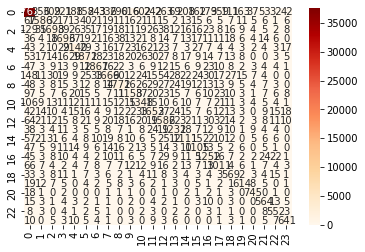

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.190141921675542
MSE: 13.918426886131424
RMSE: 3.7307407958918057


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8518496483561525
Recall Score :  0.8543965143832649
f1_score :  0.85023299941243


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 87.86913649450914


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.93     38861
           1       0.88      0.76      0.82      2127
           2       0.86      0.78      0.81      2247
           3       0.87      0.81      0.84      2170
           4       0.89      0.86      0.88      2553
           5       0.90      0.84      0.87      2318
           6       0.94      0.83      0.88      2306
           7       0.77      0.79      0.78      2252
           8       0.91      0.79      0.85      2359
           9       0.84      0.62      0.71      1982
          10       0.85      0.64      0.73      2255
          11       0.87      0.81      0.84      2176
          12       0.83      0.76      0.80      2247
          13       0.91      0.87      0.89      1512
          14       0.84      0.78      0.81      1552
          15       0.85      0.80      0.82      1473
          16       0.90      0.81      0.85      1691
 

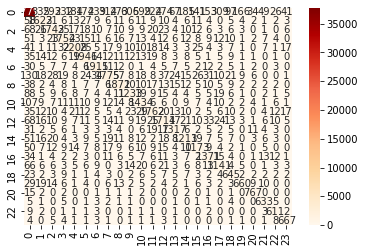

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 1.0106504955792799
MSE: 11.888577470889494
RMSE: 3.4479816517623023


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.8783413003547357
Recall Score :  0.8786913649450914
f1_score :  0.875718084394866


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 87.09073304965985


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.93     38861
           1       0.87      0.75      0.81      2127
           2       0.84      0.77      0.80      2247
           3       0.86      0.79      0.82      2170
           4       0.88      0.85      0.87      2553
           5       0.88      0.83      0.85      2318
           6       0.93      0.82      0.87      2306
           7       0.75      0.77      0.76      2252
           8       0.89      0.78      0.83      2359
           9       0.83      0.60      0.70      1982
          10       0.84      0.63      0.72      2255
          11       0.85      0.79      0.82      2176
          12       0.80      0.74      0.77      2247
          13       0.87      0.85      0.86      1512
          14       0.82      0.76      0.79      1552
          15       0.83      0.77      0.80      1473
          16       0.88      0.79      0.83      1691
 

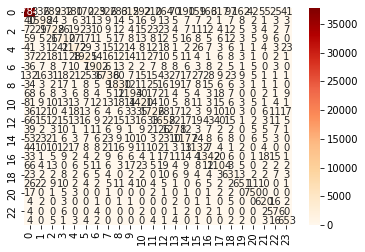

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 1.0554055087013021
MSE: 12.362256987795245
RMSE: 3.5160001404714483


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8698930490346936
Recall Score :  0.8709073304965985
f1_score :  0.8674690785708096


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 80.83038194002089


Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.90     38861
           1       0.81      0.65      0.72      2127
           2       0.76      0.63      0.69      2247
           3       0.75      0.67      0.71      2170
           4       0.80      0.77      0.79      2553
           5       0.77      0.73      0.75      2318
           6       0.87      0.73      0.79      2306
           7       0.62      0.65      0.64      2252
           8       0.81      0.67      0.73      2359
           9       0.72      0.47      0.57      1982
          10       0.76      0.49      0.60      2255
          11       0.73      0.63      0.68      2176
          12       0.64      0.57      0.60      2247
          13       0.75      0.72      0.74      1512
          14       0.69      0.63      0.66      1552
          15       0.70      0.67      0.68      1473
          16       0.80      0.66      0.72      1691
 

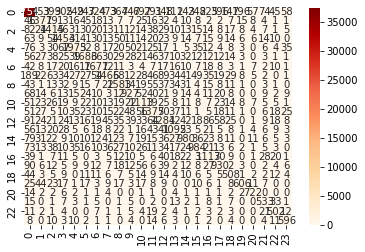

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.517912197110607
MSE: 17.5315947715749
RMSE: 4.187074727249909


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8028885397530885
Recall Score :  0.8083038194002089
f1_score :  0.8006107110201696
